In [1]:
from apps.onedimensional.shallowwaterlinearizedmomentequations import shallow_water_linearized_moment_equations as swlme
from apps.onedimensional.shallowwaterlinearizedmomentequations.manufacturedsolutionexample import manufactured_solution_example as swlme_mse
from pydogpack import main
from pydogpack.tests.utils import utils
from pydogpack.timestepping import explicit_runge_kutta
from pydogpack.utils import dg_utils
from pydogpack.utils import math_utils
from pydogpack.utils import x_functions
from pydogpack.utils import xt_functions
from pydogpack.visualize import plot

import numpy as np
import yaml
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

from IPython.display import HTML

# Manufactured Solution

In [2]:
gravity_constant = 1.0
num_moments = 1

problem = swlme_mse.ManufacturedSolutionExample(
    num_moments,
    gravity_constant,
)

time_final = 0.33
exact_final_solution = x_functions.FrozenT(problem.exact_solution, time_final)
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 1
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = True
problem.parameters["time_stepping"]["num_frames"] = 5
problem.parameters["time_stepping"]["order"] = space_time_order

num_elems = 3
x_left = 0.0
x_right = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["num_elems"] = num_elems

problem.parameters["basis"]["basis_class"] = "legendre"
problem.parameters["basis"]["inner_product_constant"] = 0.5
problem.parameters["basis"]["space_order"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl = 0.9
delta_x = (x_right - x_left) / num_elems
delta_t = float(dg_utils.get_delta_t_1d(cfl, problem.max_wavespeed, delta_x))
problem.parameters["delta_t"] = delta_t

problem._setup_objects()

In [3]:
final_solution = main.run(problem)

> /Users/caleblogemann/Documents/Education/Graduate/Research/Python/PyDogPack/pydogpack/utils/dg_utils.py(93)evaluate_weak_form()
     92     import ipdb; ipdb.set_trace()
---> 93     transformed_solution = solution.DGSolution(
     94         None, basis_, mesh_, dg_solution.num_eqns



ipdb>  n


> /Users/caleblogemann/Documents/Education/Graduate/Research/Python/PyDogPack/pydogpack/utils/dg_utils.py(94)evaluate_weak_form()
     93     transformed_solution = solution.DGSolution(
---> 94         None, basis_, mesh_, dg_solution.num_eqns
     95     )



ipdb>  n


> /Users/caleblogemann/Documents/Education/Graduate/Research/Python/PyDogPack/pydogpack/utils/dg_utils.py(97)evaluate_weak_form()
     96 
---> 97     if source_function is not None:
     98         transformed_solution = evaluate_source_term(



ipdb>  n


> /Users/caleblogemann/Documents/Education/Graduate/Research/Python/PyDogPack/pydogpack/utils/dg_utils.py(98)evaluate_weak_form()
     97     if source_function is not None:
---> 98         transformed_solution = evaluate_source_term(
     99             transformed_solution, source_function, dg_solution, t



ipdb>  n


> /Users/caleblogemann/Documents/Education/Graduate/Research/Python/PyDogPack/pydogpack/utils/dg_utils.py(99)evaluate_weak_form()
     98         transformed_solution = evaluate_source_term(
---> 99             transformed_solution, source_function, dg_solution, t
    100         )



ipdb>  n


> /Users/caleblogemann/Documents/Education/Graduate/Research/Python/PyDogPack/pydogpack/utils/dg_utils.py(102)evaluate_weak_form()
    101 
--> 102     if basis_.num_basis_cpts > 1:
    103         transformed_solution = project_flux_onto_gradient(



ipdb>  math_utils.to_dogpack_array(transformed_solution.coeffs)


array([[ 0.        ,  0.25983827],
       [ 1.        , -0.19797783],
       [ 2.        , -0.61309886],
       [ 3.        ,  0.11999816],
       [ 4.        , -0.18800017],
       [ 5.        ,  0.09308514],
       [ 6.        , -0.37983644],
       [ 7.        ,  0.38531801],
       [ 8.        ,  0.47132494]])


ipdb>  n


> /Users/caleblogemann/Documents/Education/Graduate/Research/Python/PyDogPack/pydogpack/utils/dg_utils.py(109)evaluate_weak_form()
    108     # on every face
--> 109     numerical_fluxes = evaluate_fluxes(
    110         dg_solution, t, boundary_condition, riemann_solver



ipdb>  n


> /Users/caleblogemann/Documents/Education/Graduate/Research/Python/PyDogPack/pydogpack/utils/dg_utils.py(110)evaluate_weak_form()
    109     numerical_fluxes = evaluate_fluxes(
--> 110         dg_solution, t, boundary_condition, riemann_solver
    111     )



ipdb>  n


> /Users/caleblogemann/Documents/Education/Graduate/Research/Python/PyDogPack/pydogpack/utils/dg_utils.py(112)evaluate_weak_form()
    111     )
--> 112     transformed_solution = evaluate_weak_flux(transformed_solution, numerical_fluxes)
    113 



ipdb>  n


> /Users/caleblogemann/Documents/Education/Graduate/Research/Python/PyDogPack/pydogpack/utils/dg_utils.py(114)evaluate_weak_form()
    113 
--> 114     if nonconservative_function is not None:
    115         transformed_solution = evaluate_nonconservative_term(



ipdb>  math_utils.to_dogpack_array(transformed_solution.coeffs)


array([[ 0.        , -0.39839998],
       [ 1.        , -0.59358212],
       [ 2.        , -0.50454892],
       [ 3.        ,  0.33173969],
       [ 4.        , -0.19821914],
       [ 5.        , -0.39270412],
       [ 6.        ,  0.06666029],
       [ 7.        ,  0.79114128],
       [ 8.        ,  0.84856426]])


ipdb>  q


BdbQuit: 

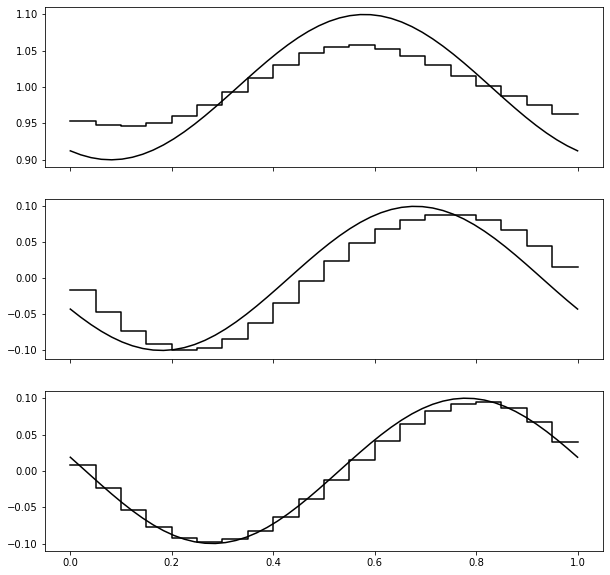

In [7]:
ani, fig = plot.create_animation_output_dir(problem.output_dir, problem.exact_solution)
HTML(ani.to_html5_video())

## Convergence Test

In [26]:
num_moments = 2
gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

problem = swlme_mse.ManufacturedSolutionExample(
    num_moments,
    gravity_constant, 
    kinematic_viscosity, 
    slip_length
)

time_final = 0.33
exact_final_solution = x_functions.FrozenT(problem.exact_solution, time_final)
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

problem.parameters["time_stepping"]["time_stepping_class"] = "dogpack"
problem.parameters["time_stepping"]["target_cfl"] = "auto"
problem.parameters["time_stepping"]["max_cfl"] = "auto"
problem.parameters["time_stepping"]["is_verbose"] = True
problem.parameters["time_stepping"]["num_frames"] = 4

x_left = 0.0
x_right = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_1d_uniform"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right

problem.parameters["basis"]["basis_class"] = "legendre"
problem.parameters["basis"]["inner_product_constant"] = 0.5

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl_dict = {1: 0.9, 2:0.3, 3:0.2, 4:0.1}

In [27]:
for space_time_order in range(1, 5):
    problem.parameters["basis"]["space_order"] = space_time_order
    problem.parameters["time_stepping"]["order"] = space_time_order
    cfl = cfl_dict[space_time_order]
    error_list = []
    n_list = [20, 40, 80, 160, 320]
#     n_list = [20, 40]
    for n in n_list:
        problem.parameters["mesh"]["num_elems"] = n
        problem.output_dir = "output_" + str(num_moments) + "_moments_" + str(space_time_order) + "_order_" + str(n)
        delta_x = (x_right - x_left) / n
        delta_t = float(dg_utils.get_delta_t_1d(cfl, problem.max_wavespeed, delta_x))
        problem.parameters["delta_t"] = delta_t
        
        problem._setup_objects()
        
        final_solution = main.run(problem)
        error = math_utils.compute_error(final_solution, exact_final_solution)
        error_list.append(error)
    order = utils.convergence_order(error_list)
    print(error_list)
    print(order)
#     with open("convergence_table_" + str(num_moments) + "_moments_" + str(space_time_order) + "_order.yml", "w") as file:
#         dict_ = {"order": [float(o) for o in order], "error_list": [float(e) for e in error_list], "n": n_list}
#         yaml.dump(dict_, file, default_flow_style=False)
#     if error_list[-1] >= math_utils.MACHINE_ERROR:
#         assert rount(order) >= num_basis_cpts

25.0%
Will finish in 0:00:00.373371 at 22:36:25.159823
50.0%
Will finish in 0:00:00.186047 at 22:36:25.034089
75.0%
Will finish in 0:00:00.085302 at 22:36:25.003203
100.0%
Will finish in 0:00:00 at 22:36:24.975555
25.0%
Will finish in 0:00:00.564462 at 22:36:25.759798
50.0%
Will finish in 0:00:00.457916 at 22:36:25.923014
75.0%
Will finish in 0:00:00.240002 at 22:36:25.967191
100.0%
Will finish in 0:00:00 at 22:36:26.086982
25.0%
Will finish in 0:00:03.744099 at 22:36:31.168947
50.0%
Will finish in 0:00:02.040871 at 22:36:30.258557
75.0%
Will finish in 0:00:00.959150 at 22:36:30.013414
100.0%
Will finish in 0:00:00 at 22:36:29.755323
25.0%
Will finish in 0:00:08.743254 at 22:36:41.477808
50.0%
Will finish in 0:00:05.476761 at 22:36:40.773658
75.0%
Will finish in 0:00:02.742495 at 22:36:40.790116
100.0%
Will finish in 0:00:00 at 22:36:40.970485
25.0%
Will finish in 0:00:36.045015 at 22:37:29.150658
50.0%
Will finish in 0:00:25.469055 at 22:37:32.028748
75.0%
Will finish in 0:00:12.98296